<a href="https://colab.research.google.com/github/Vinay3606/Medicate_predictor_project/blob/main/Medicate_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('/content/drive/MyDrive/ds project/drug200.csv')

In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [5]:
df.isna().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [6]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [8]:
df['Sex'].value_counts()

,count
Sex,
M,104
F,96


In [9]:
df['BP'].value_counts()

,count
BP,
HIGH,77
LOW,64
NORMAL,59


In [11]:
df['Cholesterol'].value_counts()

,count
Cholesterol,
HIGH,103
NORMAL,97


# Class Distribution

/tmp/ipython-input-13-2602331071.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Drug', data=df, palette='Set2')


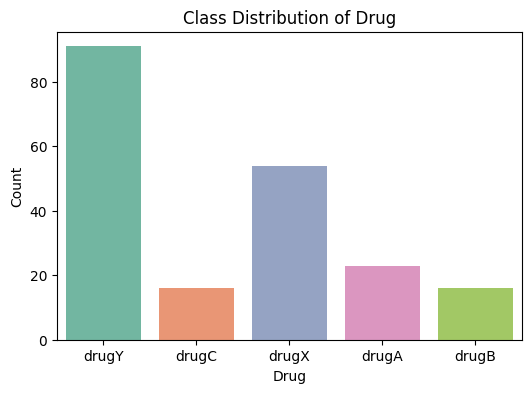

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='Drug', data=df, palette='Set2')
plt.title('Class Distribution of Drug')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-14-1459399416.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Drug', y='Age', data=df, palette='Set3')


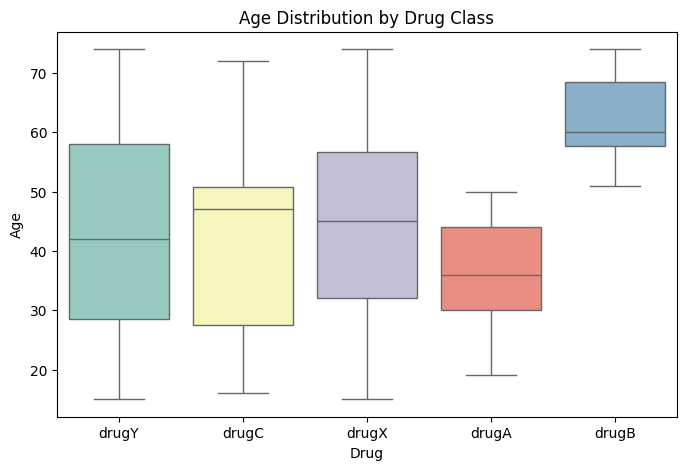

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Drug', y='Age', data=df, palette='Set3')
plt.title('Age Distribution by Drug Class')
plt.show()


/tmp/ipython-input-15-3442865647.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Drug', y='Na_to_K', data=df, palette='pastel')


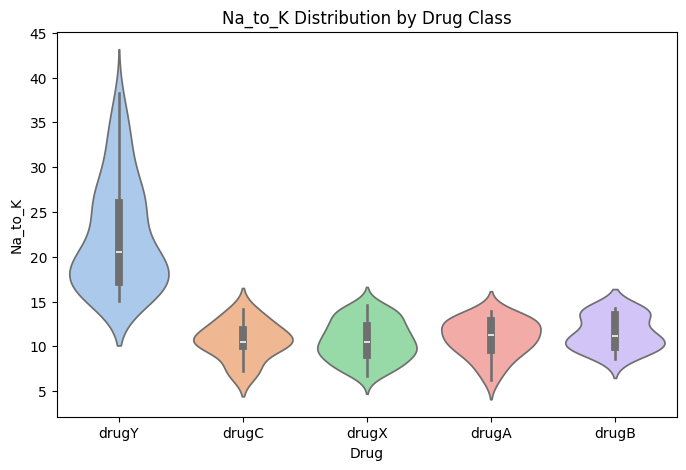

In [15]:
plt.figure(figsize=(8,5))
sns.violinplot(x='Drug', y='Na_to_K', data=df, palette='pastel')
plt.title('Na_to_K Distribution by Drug Class')
plt.show()


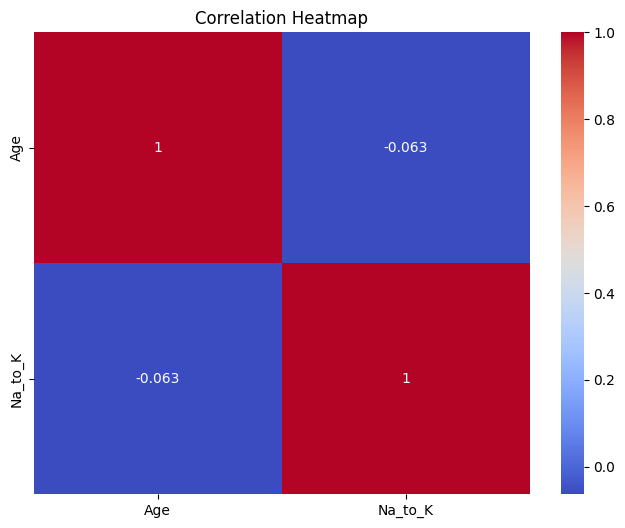

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


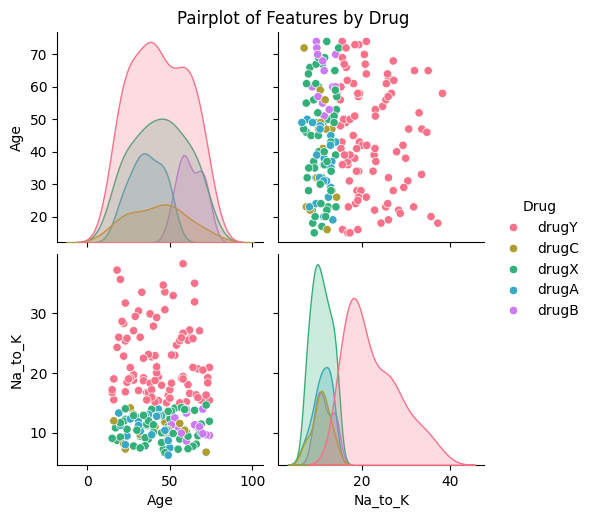

In [17]:
sns.pairplot(df, hue='Drug', palette='husl', diag_kind='kde')
plt.suptitle('Pairplot of Features by Drug', y=1.02)
plt.show()


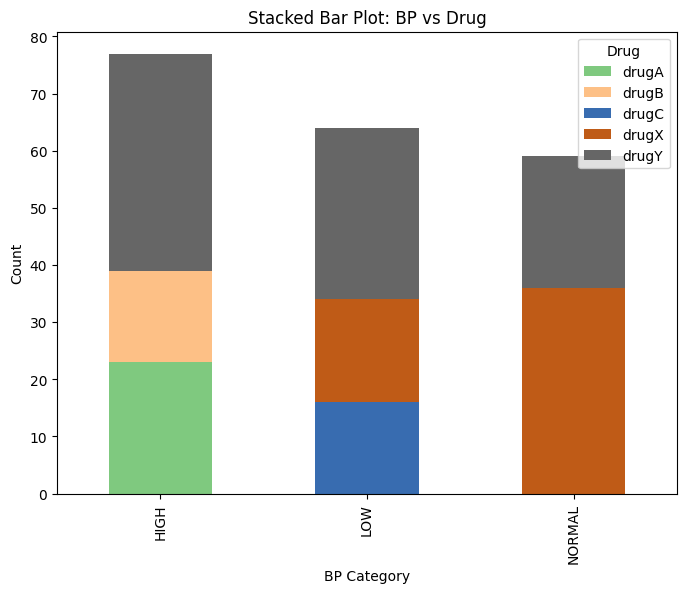

In [18]:
bp_drug = pd.crosstab(df['BP'], df['Drug'])
bp_drug.plot(kind='bar', stacked=True, colormap='Accent', figsize=(8,6))
plt.title('Stacked Bar Plot: BP vs Drug')
plt.xlabel('BP Category')
plt.ylabel('Count')
plt.legend(title='Drug')
plt.show()


In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in ['Sex', 'BP', 'Cholesterol']:
    df[col] = encoder.fit_transform(df[col])

In [20]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,20,40,60,100], labels=['Teen','Young','Adult','Senior'])
age_group_encoder = LabelEncoder()
df['AgeGroup'] = age_group_encoder.fit_transform(df['AgeGroup'].astype(str))

In [21]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'AgeGroup']]
y = df['Drug']


In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [23]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)
dt_acc = accuracy_score(y_test, y_pred_dt)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
rf_acc = accuracy_score(y_test, y_pred_rf)


In [24]:
print(f'Decision Tree Accuracy: {dt_acc:.3f}')
print(f'Random Forest Accuracy: {rf_acc:.3f}')

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))


Decision Tree Accuracy: 0.975
Random Forest Accuracy: 0.975

Classification Report (Random Forest):
              precision    recall  f1-score   support

       drugA       0.83      1.00      0.91         5
       drugB       1.00      0.67      0.80         3
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        18

    accuracy                           0.97        40
   macro avg       0.97      0.93      0.94        40
weighted avg       0.98      0.97      0.97        40



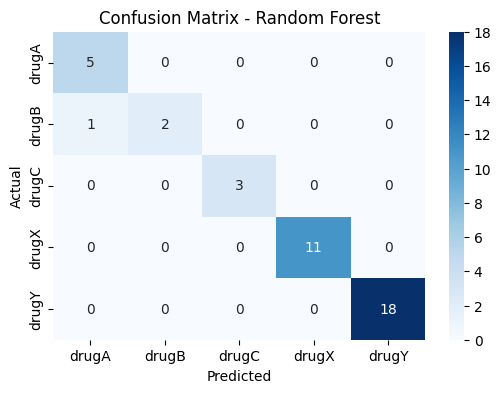

In [25]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


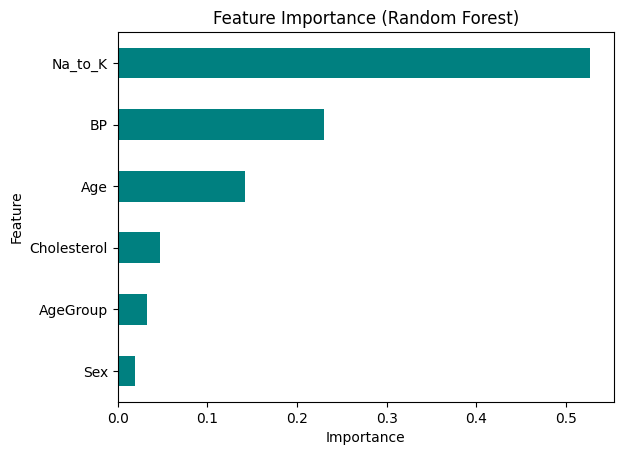

In [26]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', color='teal')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


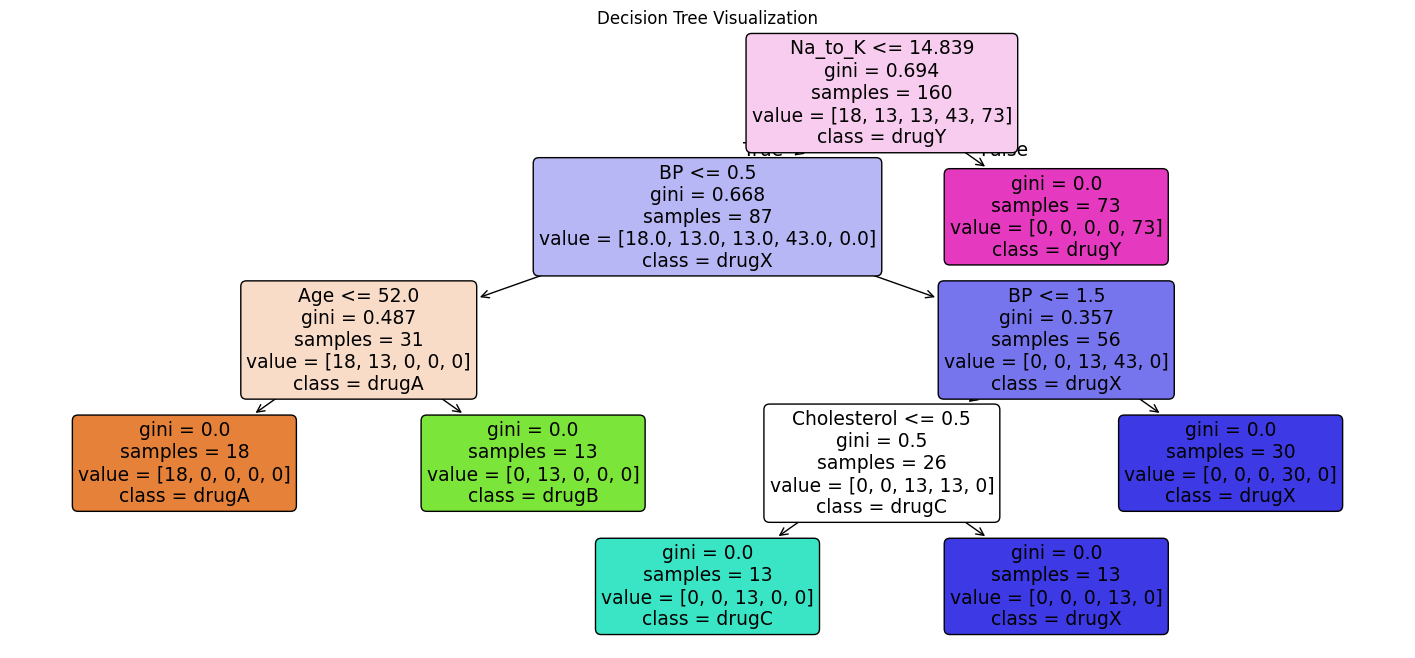

In [27]:
plt.figure(figsize=(18,8))
plot_tree(dt_model, feature_names=X.columns, class_names=dt_model.classes_, filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()


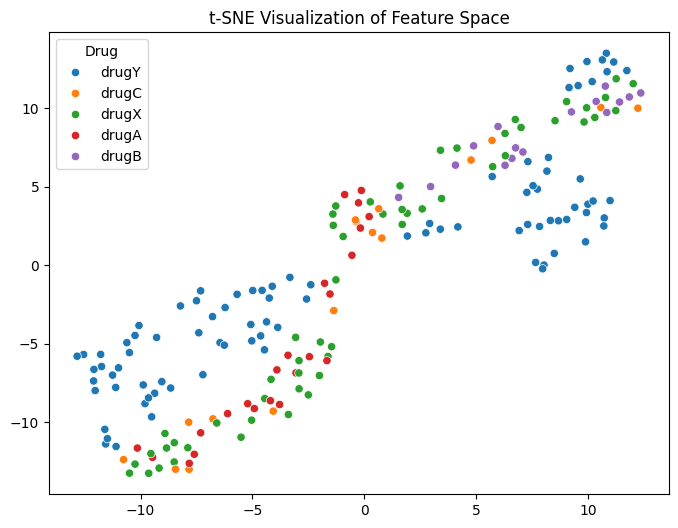

In [28]:
from sklearn.manifold import TSNE
X_numeric = X
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X_numeric)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=y, palette='tab10')
plt.title('t-SNE Visualization of Feature Space')
plt.show()


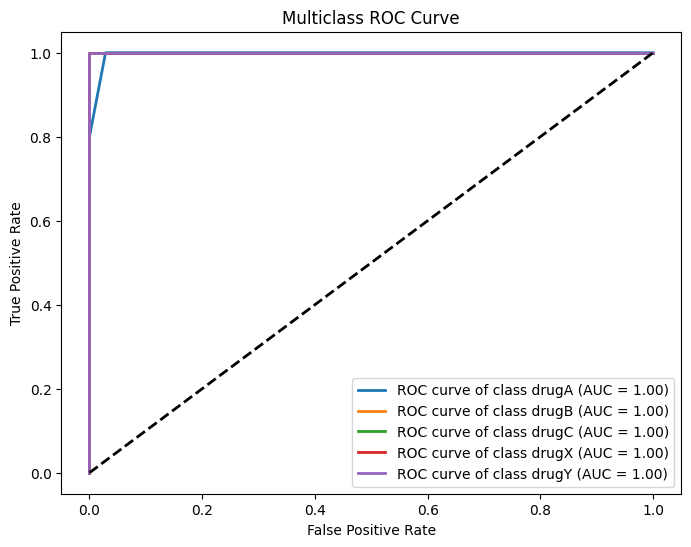

In [29]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_test_bin = label_binarize(y_test, classes=rf_model.classes_)
y_score = rf_model.predict_proba(x_test)
plt.figure(figsize=(8,6))
for i, class_name in enumerate(rf_model.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve of class {class_name} (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.show()


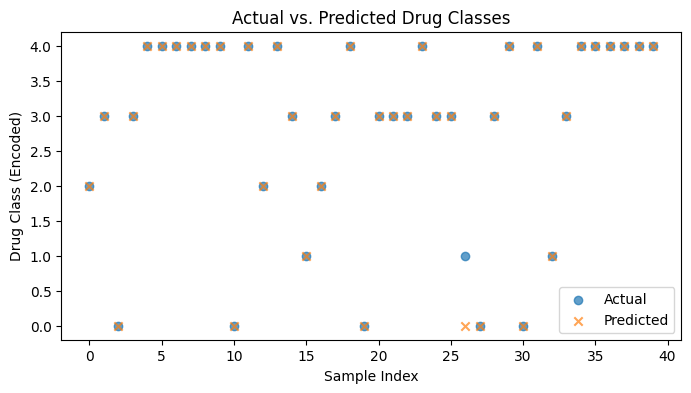

In [30]:
plt.figure(figsize=(8,4))
plt.scatter(range(len(y_test)), pd.Categorical(y_test).codes, label='Actual', alpha=0.7)
plt.scatter(range(len(y_pred_rf)), pd.Categorical(y_pred_rf).codes, label='Predicted', marker='x', alpha=0.7)
plt.legend()
plt.title('Actual vs. Predicted Drug Classes')
plt.xlabel('Sample Index')
plt.ylabel('Drug Class (Encoded)')
plt.show()


In [35]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10]
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)
print(f'Best Random Forest Parameters: {grid.best_params_}')
print(f'Best Cross-Validated Accuracy: {grid.best_score_:.3f}')


Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validated Accuracy: 0.988


In [36]:
misclassified = x_test[y_test != y_pred_rf]
print("Sample Misclassified Cases:\n", misclassified.head())


Sample Misclassified Cases:
      Age  Sex  BP  Cholesterol  Na_to_K  AgeGroup
138   51    1   0            1   11.343         0


In [37]:
import joblib
joblib.dump(grid.best_estimator_, 'drug_rf_model.joblib')
joblib.dump(encoder, 'label_encoder.joblib')


['label_encoder.joblib']

In [43]:
import joblib
def predict_drug(input_dict):
   #input_dict = {'Age': 45, 'Sex': 'M', 'BP': 'HIGH', 'Cholesterol': 'NORMAL', 'Na_to_K': 15.5}
    df_input = pd.DataFrame([input_dict])
    for col in ['Sex', 'BP', 'Cholesterol']:
        df_input[col] = encoder.transform(df_input[col])
    df_input['AgeGroup'] = pd.cut(df_input['Age'], bins=[0,20,40,60,100], labels=['Teen','Young','Adult','Senior'])
    df_input['AgeGroup'] = age_group_encoder.transform(df_input['AgeGroup'].astype(str))
    model = joblib.load('drug_rf_model.joblib')
    return model.predict(df_input)[0]